In [54]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [55]:
look_back = 8

In [75]:
df = pd.read_csv("datapoints.csv", parse_dates=[0])
df.set_axis(df['timestamp'], inplace=True)

mask = df.name.str.contains("Videolab")
videolab = df[~mask]
df = videolab.resample(rule='15T', closed='left', label='left').mean().apply(np.ceil)

# INPUT PARAMS:
# Data source -> which column contains the data to be predicted
# Preferred sampling period (EQUAL TO output period)
# Lookback_time -> [6,7,8,9] -> 10 OR [1,2,3,4,5,6,7,8,9] -> 10

,value
timestamp,
2021-04-05 02:00:00,3.0
2021-04-05 02:15:00,3.0
2021-04-05 02:30:00,3.0
2021-04-05 02:45:00,3.0
2021-04-05 03:00:00,3.0
...,...
2021-05-06 15:30:00,2.0
2021-05-06 15:45:00,2.0
2021-05-06 16:00:00,2.0


Split the data into test and train, as wel as extracting the dates, later used for plotting

In [76]:

df["timestamp"] = df.index
df["value"] = df["value"].fillna(0)

parking_data = df["value"].values
parking_data = parking_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(parking_data))

parking_train = parking_data[:split]
parking_test = parking_data[split:]

date_train = df["timestamp"][:split]
date_test = df["timestamp"][split:]



Creation of the test and train generator using the `TimeseriesGenerator` class from TensorFlow. This generator class automatically transforms this data from a series to a supervised learning model.

In [77]:
train_generator = TimeseriesGenerator(parking_train, parking_train, length=look_back, batch_size=5)
test_generator = TimeseriesGenerator(parking_test, parking_test, length=look_back, batch_size=1)

Define LSTM model with 25 epochs of training

In [78]:
model = Sequential()

model.add(LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

num_epochs = 25

model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/25
484/484 [==============================] - 6s 4ms/step - loss: 1.6238
Epoch 2/25
484/484 [==============================] - 2s 4ms/step - loss: 0.4013
Epoch 3/25
484/484 [==============================] - 2s 3ms/step - loss: 0.3589
Epoch 4/25
484/484 [==============================] - 2s 4ms/step - loss: 0.3307
Epoch 5/25
484/484 [==============================] - 2s 4ms/step - loss: 0.3500
Epoch 6/25
484/484 [==============================] - 2s 4ms/step - loss: 0.3476
Epoch 7/25
484/484 [==============================] - 2s 4ms/step - loss: 0.3374
Epoch 8/25
484/484 [==============================] - 2s 4ms/step - loss: 0.3585
Epoch 9/25
484/484 [==============================] - 2s 4ms/step - loss: 0.3402
Epoch 10/25
484/484 [==============================] - 2s 4ms/step - loss: 0.3422
Epoch 11/25
484/484 [==============================] - 2s 4ms/step - loss: 0.3366
Epoch 12/25
484/484 [==============================] - 2s 4ms/step - loss: 0.3268
Epoch 13/25
484/484 [====

In [70]:
model.save("15M")

INFO:tensorflow:Assets written to: 15M/assets


Plot the predictions and the actual data

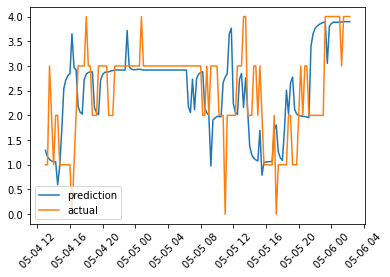

In [79]:
start_index = 400
end_index = 550

prediction = model.predict(test_generator)

parking_train = parking_train.reshape((-1))
parking_test = parking_test.reshape((-1))
prediction = prediction.reshape((-1))

plt.plot(date_test[start_index:end_index], prediction[start_index:end_index], label='prediction')
plt.plot(date_test[start_index:end_index], parking_test[start_index:end_index], label='actual')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

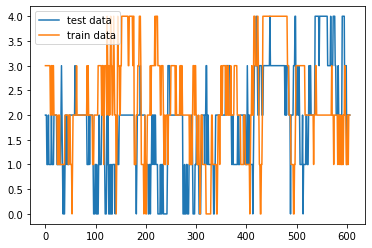

In [84]:
plt.plot(test_generator.data, label="test data")
plt.plot(train_generator.data[20:len(test_generator.data)+20], label="train data")
plt.legend(loc="best")